# Instabilidade no movimento relativístico de partículas num campo eletromagnético não uniforme


* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 03/02/2025

$\quad$ O objetivo deste `Notebook` é explorar a instabilidade na trajetória de uma partícula exposta a um campo eletromagnético não uniforme. Para isso, a trajetória da partícula será evoluída no tempo por meio de um método de integração por passos. O método utilizado será o Runge-Kutta de quarta ordem, para o qual é necessário que o leitor tenha familiaridade. Além disso, é interessante que o leitor possua uma base em relatividade especial.

$\quad$ A principal motivação para este trabalho é a referência **[1]**; portanto, caso o leitor tenha interesse em se aprofundar no conteúdo aqui exposto, ele pode acessar a referência livremente.

$\quad$ O presente `Notebook` está organizado em 3 tópicos principais:

1. Simulação Não-Relativística;
2. Simulação Relativística;
3. Conclusão.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.22631 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Sat Feb 01 23:41:48 2025 Hora oficial do Brasil

## 1. Simulação Não-Relativística

### 1.1 Introdução Teórica

$\quad$ Quando uma partícula carregada está imersa em campos elétricos e/ou magnéticos, ela sofre a ação de uma força. As características dessa força dependerão da configuração dos campos envolvidos. Se houver apenas um campo elétrico uniforme, a partícula terá uma aceleração constante em sua direção, independentemente de possuir ou não velocidade inicial. Contudo, no caso de um campo exclusivamente magnético, a força magnética sobre a partícula depende fortemente de sua velocidade inicial, pois sua definição envolve o 
produto vetorial entre a velocidade e o campo magnético $\vec{B}$.

$\quad$ No caso em que há tanto um campo elétrico quanto um campo magnético na região onde a partícula está localizada, define-se a força eletromagnética (também conhecida como força de Lorentz) como:

$$ \vec{F} = q\left( \vec{E} + \vec{v}\times \vec{B}\right), \tag{1.1}$$

onde $q$ é a carga elétrica da partícula,  $\vec{E}$ é o campo elétrico e $\vec{B}$ é o campo magnético. Essa expressão mostra que a força depende da influência de ambos os campos. Também podemos expressá-la em termos de suas componentes $F_x$, $F_y$ e $F_z$

$$F_x = q\left[ E_x + \left(\vec{v}\times \vec{B}\right)_x\right] = q\left[ E_x + v_yB_z - v_zB_y\right], $$

$$F_y = q\left[ E_y + \left(\vec{v}\times \vec{B}\right)_y\right] = q\left[ E_y + v_zB_x - v_xB_z\right],$$

$$\text{ e } \ F_z = q\left[ E_z + \left(\vec{v}\times \vec{B}\right)_z\right] = q\left[ E_z + v_xB_y - v_yB_x\right]. $$

$\quad$ No caso do exemplo analisado neste material, consideraremos um campo magnético constante na direção positiva de $z$, ou seja, $\vec{B} = B_z\hat{k}$, e um campo elétrico não constante na direção $x$, dado por $\vec{E} = \left(E_0 + \epsilon x\right)\hat{i}$, onde $E_0 \in \mathbb{R}$. Pela forma como foi definido, pode-se perceber que 

$$\frac{\partial E_x}{\partial x} = \frac{\partial }{\partial x}\left(E_0 + \epsilon x\right) = \epsilon ,$$

indicando que o parâmetro $\epsilon$ determina a variação do campo elétrico na direção $x$. Além disso, a velocidade da partícula será dada por $\vec{v} = v_x\hat{i}$. 

$\quad$ Tendo em vista essa configuração da velocidade e dos campos, onde cada um possui apenas uma componente não nula, podemos simplificar a Equação **(1.1)** para

$$F_x = q\left( E_x + v_yB_z \right), \ \ F_y = -qv_xB_z \ \ \text{e} \ \ F_z = 0.                        \tag{1.2}$$

$\quad$ Aplicando a Segunda Lei de Newton para cada componente, obtemos:  

$$ F_x = m a_x \implies a_x = \frac{F_x}{m}  \implies a_x = \frac{q}{m}\left(E_x + v_yB_z \right), \tag{1.3}$$

$$ F_y = m a_y \implies a_y = \frac{F_y}{m}  \implies a_y = -\frac{q}{m}v_xB_z \tag{1.4}$$

$$\text{e} \  F_z = m a_z \implies a_z = \frac{F_z}{m}  \implies a_z = 0. \tag{1.5}$$

$\quad$ A posição inicial adotada para a partícula será $\vec{r} = 2\hat{i}$. Portanto, como não há aceleração no eixo $z$, desconsideraremos essa componente, o que nos permite simular a trajetória da partícula utilizando apenas o plano $xy$. Além disso, destacamos que a aceleração é dada por $\vec{a} = \frac{d^2 \vec{r}}{dt^2}$, o que nos permite, a partir de **(1.3)** e **(1.4)**, obter as EDO's

$$\boxed{\frac{d^2 x(t)}{dt^2}  = \frac{q}{m}\left(E_x + v_yB_z\right)} \ \ \text{e} \ \ \boxed{\frac{d^2 y(t)}{dt^2} = -\frac{q}{m}v_xB_z}. \tag{1.6}$$

$\quad$ Utilizando essas equações diferenciais de segunda ordem para $x$ e $y$, podemos determinar a evolução do sistema. A partir da condição inicial já mencionada para a posição ($x=2$ e $y=0$), e adicionando as condições iniciais para a velocidade ($v_x = 0.99c$ e $v_y = 0$), aplicaremos o método de integração por passos de Runge-kutta de Quarta Ordem para calcular a trajetória da partícula. Para mais detalhes sobre esse método, recomenda-se a leitura do tópico 8.1 do Newman **[2]**.

### 1.2 Implementação

$\quad$ Definindo o campo magnético:

In [3]:
def B(r):
    Bx, By, Bz = 0.0, 0.0, 1.0
    return np.array([Bx,By,Bz], float)

$\quad$ Devemos definir o campo elétrico com um valor mínimo inicial. Fazendo $E_0 = 10^{-5}$, obtemos:

In [4]:
def E(r, epsilon):
    Ey, Ez = 0.0, 0.0
    E0 = 1e-5
    x = r[0]
    Ex = E0 + epsilon*x
    return np.array([Ex,Ey,Ez], float)

$\quad$ Por conveniência na aplicação do método de Runge-Kutta, definiremos um vetor **r** com um formato de componentes diferente do vetor posição $\vec{r}$. Ele será dado por $r = (x,\frac{d x}{dt},y,\frac{d y}{dt}) = (x, v_x, y, v_y)$. Além disso, será conveniente já incluir a variável `epsilon` na função. Assim, utilizando as equações diferenciais ordinárias de **(1.6)**, definiremos a seguinte função:

In [5]:
def f(r,t, epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]
        
    fx = vx
    fvx = (q/m)*(Ex+vy*Bz)
    fy = vy
    fvy = -(q/m)*(vx*Bz)
    
    return np.array([fx,fvx, fy, fvy], float)

$\quad$ Método Runge-Kutta de Quarta Ordem:

In [6]:
def R4K(r,t,dt, epsilon):
    k1 = dt*f(r,t, epsilon)
    k2 = dt*f(r + 0.5*k1,t + 0.5*dt, epsilon)
    k3 = dt*f(r + 0.5*k2, t + 0.5*dt, epsilon)
    k4 = dt*f(r + k3, t + dt, epsilon)
    return r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

$\quad$ Constantes, definidas com unidades arbitrárias:

In [7]:
c = 1.0 # Velocidade da Luz.
m = 1.0 # Massa da partícula.
q = 1.0 # Carga da partícula.

$\quad$ Começaremos evoluindo e plotando a trajetória de uma partícula para $\epsilon = 0.0$. Ou seja, o campo elétrico será constante com módulo $|\vec{E}| = 10^{-5}$ na direção positiva de $x$. Durante esse e os seguintes códigos, estarei ajustando a variável `tf` de modo que a visualização fique satisfatória.

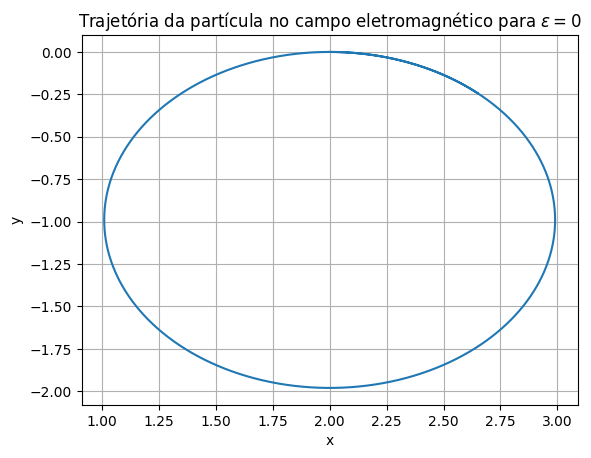

In [8]:
x, vx, y, vy = 2.0, 0.99, 0.0, 0.0 # r = (x,vx,y,vy); condição inicial.
    
ti = 0 # Tempo Inicial.
tf = 7 # Tempo final.
N = 50000 # Quantidade de passos.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon = 0 # Parâmetro.

r = np.array([x,vx,y,vy], float) # vetor com a condição inicial.

x_points = [r[0]] # Lista para armazenar os pontos x, já inicializado com o valor inicial de x.
y_points = [r[2]] # Lista para armazenar os pontos y, já inicializado com o valor inicial de y.

for t in ts:
    r = R4K(r,t,dt, epsilon) # Atualizar o valor de r(t) -> r(t+dt) pelo método de Runge-Kutta.
    x_points.append(r[0]) # Armezenar o valor atual de x.
    y_points.append(r[2]) # Armezenar o valor atual de y.
    
# Plotagem da Solução
plt.plot(x_points, y_points)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title(fr'Trajetória da partícula no campo eletromagnético para $\epsilon = {epsilon}$')
plt.show()

$\quad$ Como esperado, dado que ambos os campos são constantes, a trajetória é uma circunferência (neste caso, de raio 2). Vamos repetir o mesmo processo de atualização da trajetória para diferentes valores de $\epsilon$>0, mantendo a mesma condição inicial.

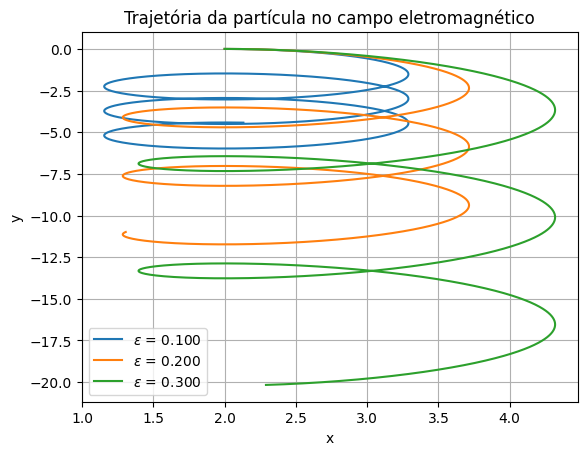

In [9]:
epsilon_values = [0.1, 0.2, 0.3] # Valores do epsilon analizados.

tf = 20 # Tempo Final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Tamanho do passo temporal.

for epsilon in epsilon_values: # Analisar o comportamento da trajetória para cada valor de epsilon. 
    r = np.array([x,vx,y,vy], float)  #Condição inicial.
    x_points = [r[0]] 
    y_points = [r[2]]

    for t in ts: # Evoluir a partícula para esse valor de epsilon.
        r = R4K(r,t,dt, epsilon) # Evoluir a posição r(t) -> r(t+dt)
        x_points.append(r[0]) # Armazenar o atual valor de x(t).
        y_points.append(r[2]) # Armazenar o atual valor de y(t).
    

    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.3f}$')
    

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Assim, percebemos que aumentar o valor do parâmetro  $\epsilon$ resulta em uma maior oscilação espacial da partícula no eixo $x$, com uma trajetória visivelmente periódica, mas não mais simplesmente circular.

$\quad$ Em gráficos futuros deste `Notebook`, será interessante representar a força instantânea atuando na partícula. Para isso, utilizaremos as duas primeiras equações presentes em **(1.2)**,

$$F_x = q\left( E_x + v_yB_z \right) \ \ \text{e} \ \ F_y = -qv_xB_z,$$

para ilustrar a força através de um campo vetorial, escolhendo determinados valores de $\vec{r}$ para aplicar $\vec{F}_{(\vec{r})} = F_x\hat{i} + F_y\hat{j}$. Definindo a função:

In [10]:
def Force(r, epsilon):
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2] # Componente z do campo magnético.
    Ex = E_field[0] # Componente x do campo elétrico.

    fx = q*(Ex+vy*Bz)
    fy = -q*vx*Bz

    return np.array([fx,fy], float)

$\quad$ Escolhendo arbitrariamente o valor $\epsilon = 0.200$, podemos desenvolver o seguinte código para ilustrar a força agindo sobre a partícula em determinados pontos da trajetória.

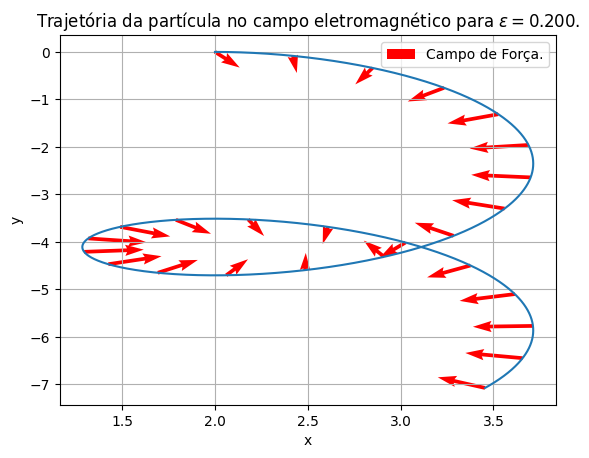

In [11]:
tf = 10 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização temporal.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon = 0.200 # Valor de epsilon

r = np.array([x,vx,y,vy], float)   
x_points = [r[0]]
y_points = [r[2]]

o = 0 # Contador.
for t in ts:
    r = R4K(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])
    
    if o%2000 == 0: # Condição para plotar o vetor força para apenas alguns valores da trajetória.
        plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=3, color='r') # Plot do vetor.
    o+=1 

# Plot para adicionar a legenda.
plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=3, color='r', label = "Campo de Força.")

plt.plot(x_points, y_points)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.title(rf'Trajetória da partícula no campo eletromagnético para $\epsilon = {epsilon:.3f}$.')
plt.show()

$\quad$ Onde percebemos que a representação da força está de acordo com a trajetória descrita pela partícula.

$\quad$ Uma característica deste exemplo é que, para valores de $\epsilon \geq 1$, a trajetória da partícula deixa de ser oscilatória, tornando-se uma trajetória instável. Ilustraremos o limiar de início desse comportamento plotando a trajetória para valores $\epsilon \in $ {0.900, 0.950, 1.00}.

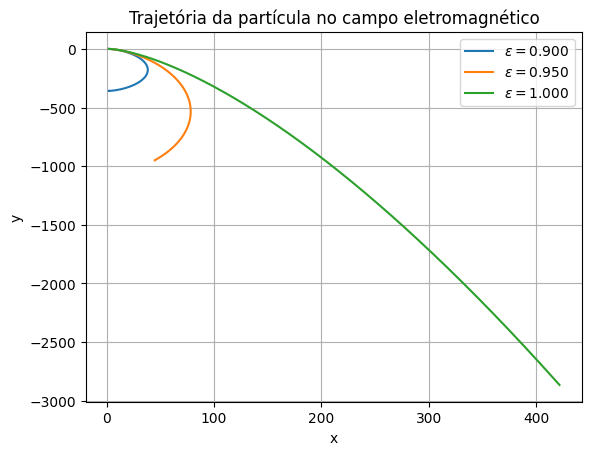

In [12]:
tf = 20 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon_values = [0.900, 0.950, 1] # Parâmetros.

for epsilon in epsilon_values:
    r = np.array([x,vx,y,vy], float) # vetor com a condição inicial.

    x_points = [r[0]] # Lista para armazenar os pontos x, já inicializado com o valor inicial de x.
    y_points = [r[2]] # Lista para armazenar os pontos y, já inicializado com o valor inicial de y.    

    for t in ts:
        r = R4K(r,t,dt, epsilon) # Atualizar o valor de r(t) -> r(t+dt) pelo método de Runge-Kutta.
        x_points.append(r[0]) # Armezenar o valor atual de x.
        y_points.append(r[2]) # Armezenar o valor atual de y.
    
    plt.plot(x_points, y_points, label = rf'$\epsilon = {epsilon:.3f}$')        

# Plotagem da Solução
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Buscando compreender o comportamento da força que ocasiona tal instabilidade, representaremos a trajetória instável junto com o campo de forças. Também será interessante a representação do campo de velocidades ($\vec{v}_{(\vec{r})} = v_x\hat{i} + v_y\hat{j}$).

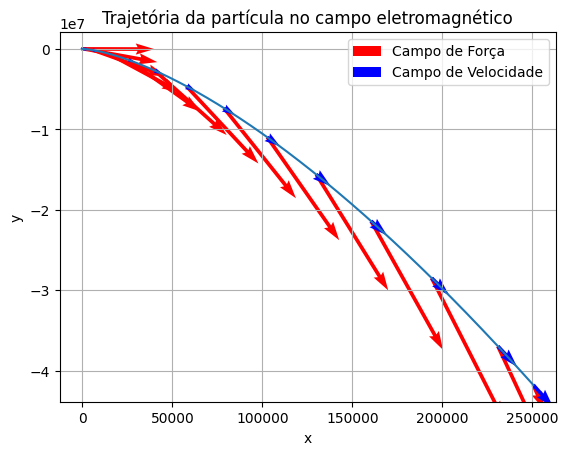

In [13]:
tf = 500 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização temporal.
dt = ts[1]-ts[0] # Passo temporal.

epsilon = 1 # Parâmetro.

r = np.array([x,vx,y,vy], float)  # Vetor r com a condição inicial. 

x_points = [] # Lista para armazenar os valores de x.
y_points = [] # Lista para armazenar os valores de x.
force_x_values = [] # Lista para armazenar os valores de fx.
force_y_values = [] # Lista para armazenar os valores de fy.

o = 0 # Contador
for t in ts:
    r = R4K(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])
    force_x_values.append(Force(r,epsilon)[0])
    force_y_values.append(Force(r,epsilon)[1])

    if o%4000 == 0: # Condição para plotar a força e velocidade para apenas alguns valores de r.
        plt.quiver(r[0], r[2],Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.00005, color='r')
        plt.quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
    o+=1 

# Plot adicional dos vetores apenas para inserir a legenda.
plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', color='r', label = "Campo de Força") # Plot apenas para adicionar a legenda. 
plt.quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b', label = "Campo de Velocidade") # Plot apenas para adicionar a legenda.

#Plotagem da trajetória.
plt.plot(x_points, y_points)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ A figura acima não nos dá uma boa dimensão do que está acontecendo com a força nem com a futura trajetória da partícula (para valores `t` > `tf`), pois, apesar de a trajetória aparentar ser instável, poderia-se argumentar que ainda não houve tempo suficiente para a partícula iniciar o movimento curvilíneo oscilatório (mesmo tendo sido utilizado um tempo final bastante alto). Além disso, é necessário destacar a diferença entre a escala dos eixos. Enquanto o eixo vertical está expondo pouco mais do que $4$ unidades, o eixo horizontal chega a alcançar o ponto $x=250000$. Dito isso, plotaremos o valor das componentes da força em função do tempo (primeiro isoladamente, depois juntas em um mesmo gráfico, para dar uma noção da escala entre elas).

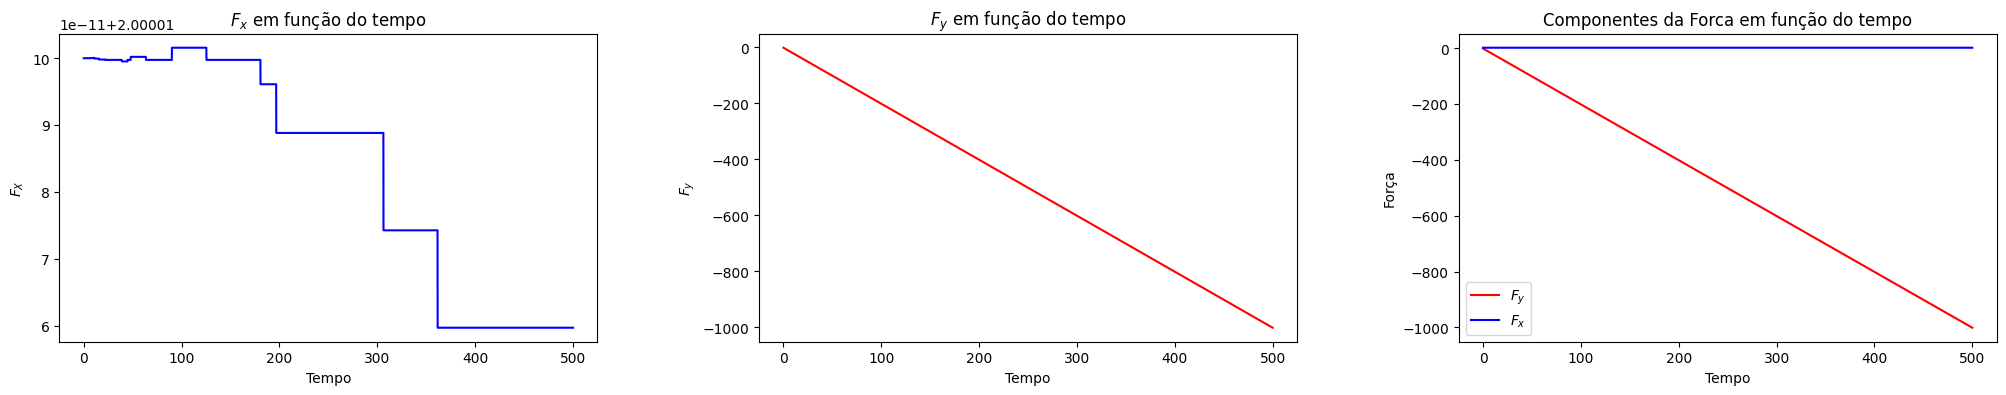

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel(f'$F_X$')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel(f'$F_y$')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo")
axes[2].legend()
axes[2].set_ylabel("Força")

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ O gráfico deixa claro que a componente $F_y$ da força cresce (em módulo) indefinidamente, enquanto a componente $F_x$ vai se tornando cada vez mais desprezível na força resultante. Esse não é o comportamento esperado para uma trajetória curvilínea, pois, independentemente do ponto em que a partícula se encontra, a força resultante estará sempre na direção vertical.

$\quad$ Um último gráfico que podemos traçar é o do módulo da velocidade em função do tempo. A partir da imagem anterior, espera-se que o módulo da velocidade aumente indefinidamente desde o início, o que é justamente o que se observa na imagem abaixo.

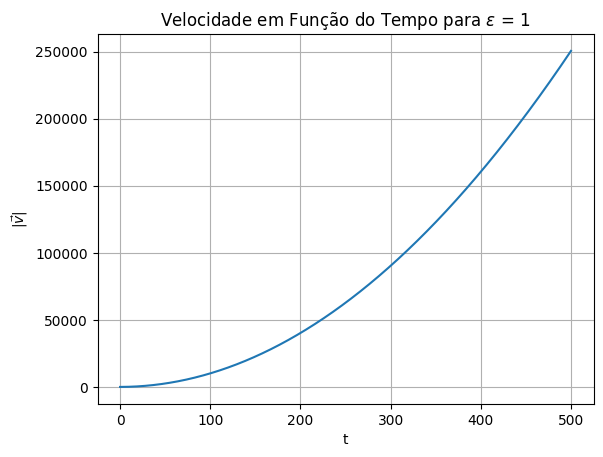

In [15]:
r = np.array([x,vx,y,vy], float)  # Vetor r com a condição inicial. 
velocidade_values = []

for t in ts:
    r = R4K(r,t,dt, epsilon)
    vel = (r[1]**2 + r[3]**2)**(1/2)
    velocidade_values.append(vel)

#Plotagem da trajetória.
plt.plot(ts, velocidade_values)
plt.xlabel('t')
plt.ylabel(r'$|\vec{v}|$')
plt.title(rf'Velocidade em Função do Tempo para $\epsilon$ = 1')
plt.grid()
plt.show()

$\quad$ Não é surpreendente pensar que o gráfico anterior mostre que a velocidade da partícula (que iniciou com $v = 0.99c$) está crescendo de maneira indefinida, afinal, trata-se de uma simulação clássica. As expressões utilizadas em nenhum momento limitam a velocidade da partícula, sendo esse o motivo pelo qual ela ultrapassa, e muito, a velocidade da luz na simulação. Portanto, tal instabilidade apresentada não tem sentido físico. Veremos que a situação será bem diferente no caso relativístico.

## 2. Simulação Relativística

### 2.1 Introdução Teórica

$\quad$ Na relatividade, a aceleração sofrida por uma partícula devido a ação de uma força $\vec{F}$ é definida como **[3]**

$$ \vec{a} = \frac{\vec{F}}{m_0\gamma} - \frac{\vec{v}}{m_0\gamma c^2}\left( \vec{F} \cdot \vec{v} \right), \tag{2.1}$$

onde $m_0$ é a massa de repouso da partícula e $\gamma$ é o fator de lorentz, definido como $\gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Os restantes dos símbolos tem seus significados padrões. A partir dessa definição, podemos desenvolver expressões relativísticas para $\frac{d^2 x(t)}{dt^2}$ e $\frac{d^2 y(t)}{dt^2}$, já adaptando para nosso exemplo, com os determinados campos tendo apenas sua respectiva componente. Assim, começamos desenvolvendo separadamente o termo do produto interno da Equação **(2.1)**:

$$ \vec{F}\cdot \vec{v} = \left[ \left( F_x\hat{i} + F_y\hat{j} + F_z\hat{k}\right) \cdot \left( v_x\hat{i} + v_y\hat{j} + v_z\hat{k}\right)\right] = F_xv_x + F_yv_y + F_zv_z,$$

mas a mesma análise feita anteriormente vale, onde ambos $F_z$ e $v_z$ serão igual a zero, então

$$ \vec{F}\cdot \vec{v} = F_xv_x + F_yv_y.$$

Utilizando os valores das componentes $F_x$ e $F_y$ expostos em **(1.2)**, obtemos

$$ \vec{F}\cdot \vec{v} = q\left[ E_x + v_yB_z \right]v_x - qv_xB_zv_y = qE_xv_x + qv_yB_zv_x - qv_xB_zv_y$$

$$\therefore \ \boxed{\vec{F}\cdot \vec{v} = qE_xv_x}. $$

$\quad$ Substituindo o valor do produto escalar obtido em **(2.1)** e desenvolvendo para cada componente, tem-se

$$ \frac{d^2 x(t)}{dt^2} = \frac{F_x}{m_0\gamma} - \frac{v_x}{m_0\gamma c^2}qE_xv_x = \frac{q\left[ E_x + v_yB_z \right]}{m_0\gamma} - \frac{v_x}{m_0\gamma c^2}qE_xv_x = \frac{q}{m_0\gamma} \left[E_x + v_yB_z - \frac{v_x^2E_x}{c^2}    \right] $$

$$\text{e}\ \ \frac{d^2 y(t)}{dt^2} = \frac{F_y}{m_0\gamma} - \frac{v_y}{m_0\gamma c^2}qE_xv_x  = \frac{\left(-qv_xB_z\right)}{m_0\gamma} - \frac{v_y}{m_0\gamma c^2}qE_xv_x = -\frac{q}{m_0\gamma} \left[v_xB_z +\frac{v_xv_yE_x}{c^2} \right].$$

Utilizando $\frac{1}{\gamma} = \frac{1}{\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}} = \sqrt{1-\frac{v^2}{c^2}}$, as expressões ainda podem ser escritas como

$$ \boxed{\frac{d^2 x(t)}{dt^2} = \frac{q}{m_0}\sqrt{1-\frac{v^2}{c^2}}\left(E_x + v_yB_z - \frac{v_x^2E_x}{c^2} \right)} \ \ \text{e} \ \ \boxed{\frac{d^2 y(t)}{dt^2} = -\frac{q}{m_0}\sqrt{1-\frac{v^2}{c^2}}\left(v_xB_z + \frac{v_xv_yE_x}{c^2} \right)}. \tag{2.2}$$

### 2.2 Implementação

$\quad$ Implementando a função que será utilizada como base para a atualização da posição (usando o Runge-Kutta): 

In [16]:
def frel(r,t, epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]

    v = np.sqrt(vx**2 + vy**2)
    
    fator = np.sqrt(1-(v**2)/(c**2))
    
    fx = vx
    fvx = (q/m)*fator*(Ex + vy*Bz-((vx**2)*Ex)/(c**2))
    fy = vy
    fvy = -(q/m)*fator*(vx*Bz+ (vx*vy*Ex)/(c**2))

    return np.array([fx, fvx, fy, fvy])    

$\quad$ Definindo uma nova função para o Runge-Kutta, considerando agora a nova função de atualização:

In [17]:
def R4Krel(r,t,dt,epsilon):
    k1 = dt*frel(r,t, epsilon)
    k2 = dt*frel(r + 0.5*k1,t + 0.5*dt,epsilon)
    k3 = dt*frel(r + 0.5*k2, t + 0.5*dt,epsilon)
    k4 = dt*frel(r + k3, t + dt,epsilon)
    return r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

$\quad$ Assim como no primeiro gráfico realizado para o caso não-relativístico, começaremos com um plot de uma situação simplificada. Evoluindo a trajetória da partícula com as mesmas condições iniciais, vamos primeiro definir  $\epsilon = 0$. 

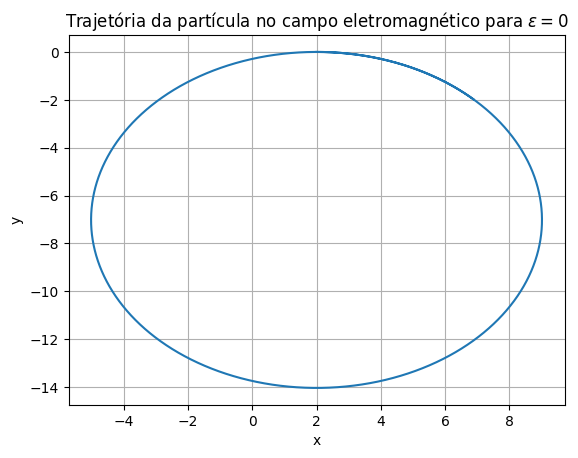

In [18]:
tf = 50 # Tempo Final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon = 0 # Parâmetros

r = np.array([x,vx,y,vy], float) # Vetor r com a condição inicial.   

x_points = [r[0]] 
y_points = [r[2]]
    
for t in ts:
    r = R4Krel(r,t,dt, epsilon)

    x_points.append(r[0])
    y_points.append(r[2])

plt.plot(x_points, y_points)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title(rf'Trajetória da partícula no campo eletromagnético para $\epsilon = {epsilon}$')
plt.show()

$\quad$ Não se observa nenhum comportamento singular para esse caso simples. Agora, analisando para $\epsilon \in $ {0.100, 0.200, 0.300}, veremos o comportamento da trajetória.

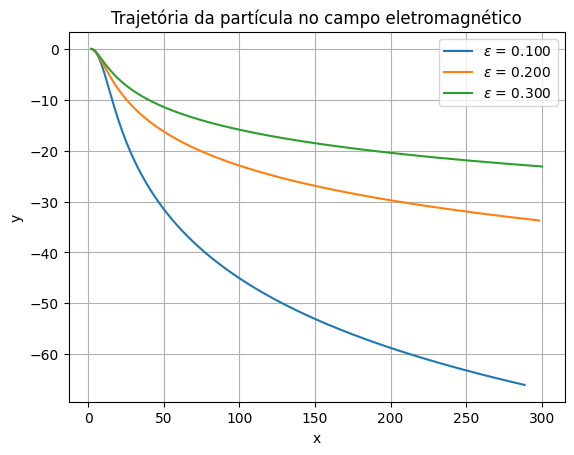

In [19]:
epsilon_values = [0.1, 0.2, 0.3]

tf = 300 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

for epsilon in epsilon_values:
    r = np.array([x,vx,y,vy], float)   
    x_points = [r[0]]
    y_points = [r[2]]
    
    for t in ts:
        r = R4Krel(r,t,dt, epsilon)
        x_points.append(r[0])
        y_points.append(r[2])
    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.3f}$')

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Apesar de serem os mesmos parâmetros, já podemos perceber um comportamento bem diferente do gráfico análogo no caso não-relativístico, onde não há o mínimo sinal de que a partícula entraria em movimento periódico. No entanto, para uma análise mais precisa da situação, precisamos estudar a evolução da força (mais precisamente, suas componentes) no tempo, buscando traçar um paralelo entre os gráficos da trajetória e da força.

$\quad$ Visando esse objetivo, desta vez, a partir da Equação **(2.2)**, definiremos uma equação para a força instantânea que atua na partícula, de maneira análoga ao que fizemos no tópico anterior. A partir da Equação **(2.2)**, multiplicando todos os lados por $m_0$, obteremos 

$$ F_x = q\sqrt{1-\frac{v^2}{c^2}}\left(E_x + v_yB_z - \frac{v_x^2E_x}{c^2} \right) \ \ \text{e} \ \ F_y = q\sqrt{1-\frac{v^2}{c^2}}\left(v_xB_z + \frac{v_xv_yE_x}{c^2} \right). \tag{2.3}$$

$\quad$ Usaremos essas expressões tanto para representar a força através de um campo vetorial ($\vec{F}_{(\vec{r})}$) quanto para armazenar os valores da força em cada instante de tempo e, em seguida, plotar um gráfico dela em função do tempo. A função será

In [20]:
def ForceRel(r,epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r,epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]

    v = np.sqrt(vx**2 + vy**2)
    
    fator = np.sqrt(1-(v**2)/(c**2))
    
    fx = q*fator*(Ex + vy*Bz-((vx**2)*Ex)/(c**2))
    fy = -q*fator*(vx*Bz+ (vx*vy*Ex)/(c**2))

    return np.array([fx,fy], float)

$\quad$ Analisar a evolução da força para os três casos (de $\epsilon = $ $0.1$, $0.2$ e $0.3$) simultaneamente seria visualmente ineficiente, portanto, devemos escolher um desses valores e focar em uma análise separada. Escolhendo $\epsilon = 0.100$, desenvolvemos os gráficos:

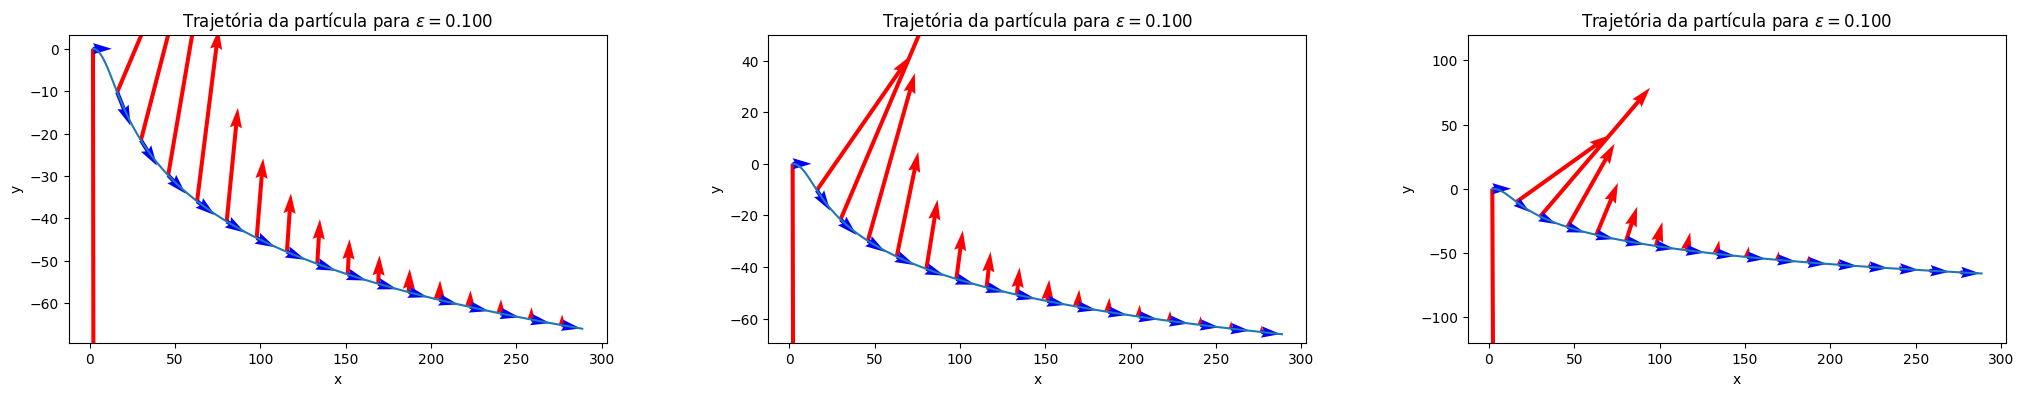

In [21]:
epsilon = 0.100

r = np.array([x,vx,y,vy], float)   
x_points = [r[0]]
y_points = [r[2]]

fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

o = 0
for t in ts:
    r = R4Krel(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])

    if o%3000 == 0:
        axes[0].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[0].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
        
        axes[1].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[1].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
        
        axes[2].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[2].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')

    o+=1

axes[0].plot(x_points, y_points)
axes[0].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")


axes[1].plot(x_points, y_points)
axes[1].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_ylim(None,50)

axes[2].plot(x_points, y_points)
axes[2].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
axes[2].set_ylim(-120,120)

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ A partir de uma visualização qualitativa, podemos perceber que, no início da trajetória, a força tem um módulo muito grande, com direção vertical e sentido para baixo, o que faz com que a partícula inicie a trajetória indo para baixo bruscamente. Um pouco mais à frente, o sentido da força se inverte, diminuindo também o módulo à medida que a trajetória avança. Passado algum tempo, a força parece tender a zero, o que faz com que a partícula tenda a seguir um caminho reto, já que a força agindo sobre ela se torna quase nula. Contudo, por razões de escalas, os gráficos anteriores nos fornecem apenas uma noção geral sobre a direção da força, além de oferecerem uma análise comparativa do módulo da força em diferentes pontos da trajetória. Ou seja, sabemos que a força começa grande, mas vai diminuindo em módulo, embora não saibamos com precisão o quanto ela está influenciando a partícula. Assim, torna-se mais interessante traçar um gráfico da força em função do tempo, observando tanto a escala quanto a evolução da força.

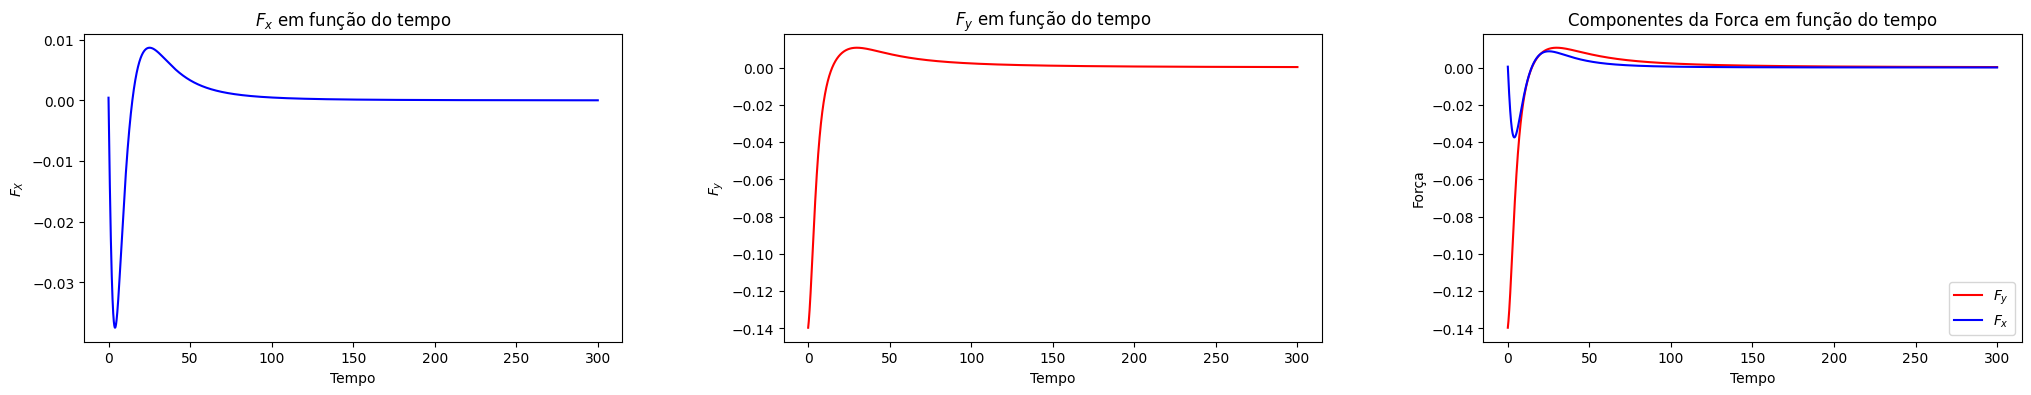

In [22]:
r = np.array([x,vx,y,vy], float)   
force_x_values = []
force_y_values = []

for t in ts:
    r = R4Krel(r,t,dt, epsilon)
    force_x_values.append(ForceRel(r,epsilon)[0])
    force_y_values.append(ForceRel(r,epsilon)[1])

fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel(f'$F_X$')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel(f'$F_y$')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo")
axes[2].legend()
axes[2].set_ylabel("Força")

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ Observamos que a força realmente apresenta uma variação brusca no início da trajetória, mas, após algum tempo, ambas as componentes tendem a zero. Para uma visualização completa da situação, também traçaremos um gráfico da velocidade em função do tempo.

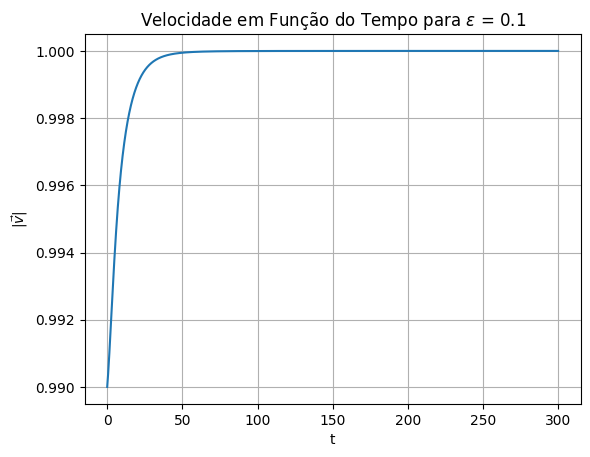

In [23]:
r = np.array([x,vx,y,vy], float)   
velocidade = []

for t in ts:
    vel = (r[1]**2 +r[3]**2)**(1/2)
    velocidade.append(vel)  
    r = R4Krel(r,t,dt, epsilon)

plt.plot(ts, velocidade)
plt.xlabel('t')
plt.ylabel(r'$|\vec{v}|$')
plt.title(rf'Velocidade em Função do Tempo para $\epsilon$ = {epsilon}')
plt.grid()
plt.show()

$\quad$ Esse último gráfico deixa claro que a velocidade sofre uma considerável variação no início, aparentando tender a $c = 1$ (velocidade da luz). Contudo, como vimos no gráfico da força, essa tendência não persiste por muito tempo, já que a força tende a zero por volta de $t = 100$.

$\quad$ Por último, vamos criar um gráfico onde a trajetória apresente o mesmo caráter periódico observado em alguns gráficos não-relativísticos. Simultaneamente, procuraremos o limiar em que a trajetória começa a apresentar a instabilidade recentemente analisada. Assim, ao escolher valores convenientes para $\epsilon$, obtemos o gráfico mostrado abaixo.  

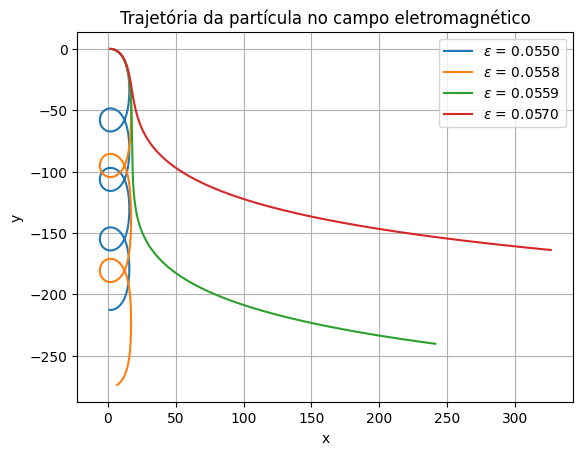

In [24]:
tf = 400 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

epsilion_values = [0.0550, 0.0558, 0.0559, 0.0570]

for epsilon in epsilion_values:
    r = np.array([x,vx,y,vy], float)   
    x_points = []
    y_points = []
    x_points.append(r[0])
    y_points.append(r[2])

    for t in ts:
        r = R4Krel(r,t,dt, epsilon)
        x_points.append(r[0])
        y_points.append(r[2])
           
    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.4f}$')
    
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Assim, como no caso não-relativístico, sabemos que, para um valor de $\epsilon \geq \epsilon_0 = 0.0559$, a trajetória se torna instável. Contudo, duas diferenças se destacam: a primeira é que essa instabilidade ocorre para um valor de $\epsilon$ bem menor do que no caso não-relativístico, embora as mesmas condições iniciais e a configuração dos campos tenham sido mantidas; a segunda é que essa instabilidade parece ter uma natureza diferente da anterior. 

$\quad$ Traçando agora um gráfico da força e da velocidade para uma das situações estável, podemos confirmar a natureza cíclica tanto da força quanto da velocidade. Escolhendo $\epsilon = 0.0558$ (trajetória em laranja), desenvolvemos o código:

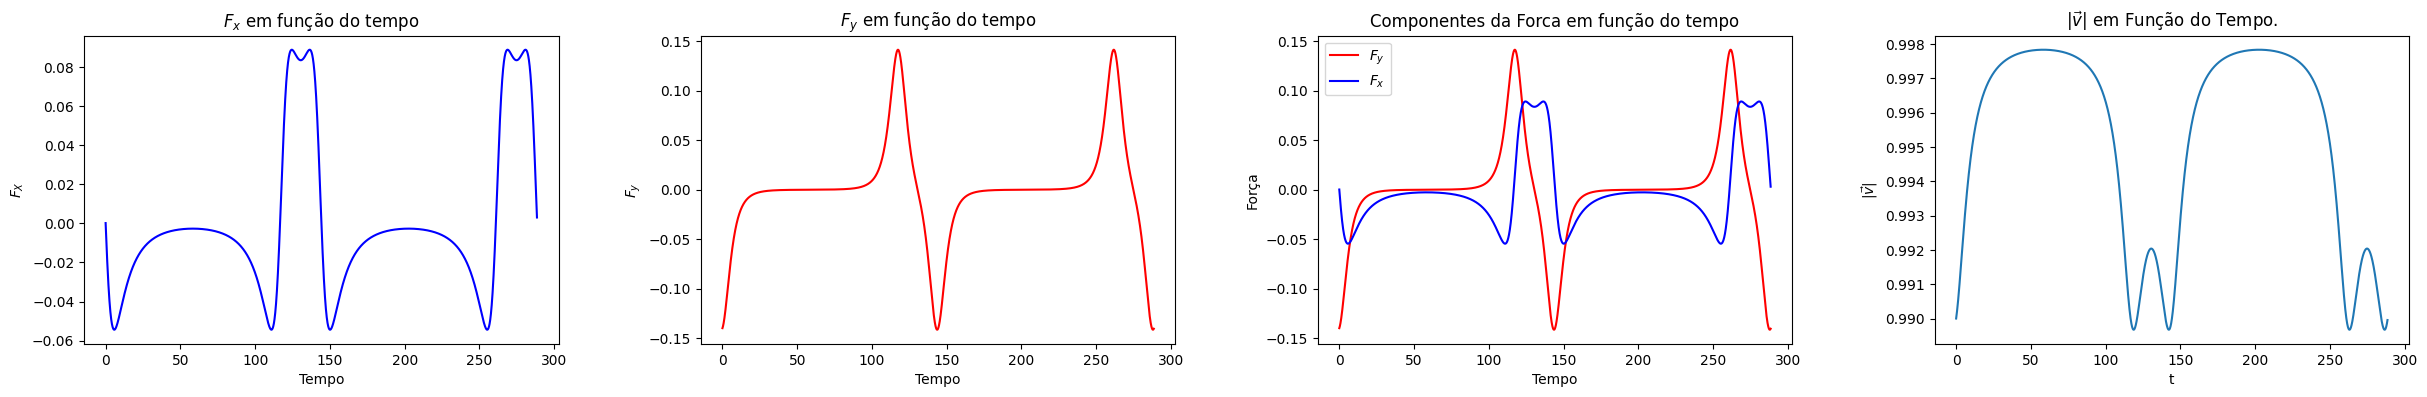

In [25]:
tf = 288.5 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

epsilon = 0.0558

r = np.array([x,vx,y,vy], float)   

force_x_values = []
force_y_values = []
velocidade = []

for t in ts:
    r = R4Krel(r,t,dt,epsilon)

    vel = (r[1]**2 + r[3]**2)**(1/2)
    velocidade.append(vel)
    force_x_values.append(ForceRel(r, epsilon)[0])
    force_y_values.append(ForceRel(r, epsilon)[1])

fig, axes = plt.subplots(1, 4, figsize=(30, 4))  # 1 linha, 4 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel(f'$F_X$')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel(f'$F_y$')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo")
axes[2].legend()
axes[2].set_ylabel("Força")

axes[3].plot(ts,velocidade)
axes[3].set_title(r'$|\vec{v}|$ em Função do Tempo.')
axes[3].set_xlabel('t')
axes[3].set_ylabel(r'$|\vec{v}|$')

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ Percebe-se que tanto a força quanto a velocidade oscilam com período $T \approx 145$. Ao aumentar o valor de $\epsilon$ em $0.0001$, obteremos um perfil bem diferente para os gráficos, sem apresentar mais nenhum caráter oscilatório. Comprovaremos isso desenvolvendo o mesmo código acima, mas agora para $\epsilon = 0.0559$ (o limiar da instabilidade).

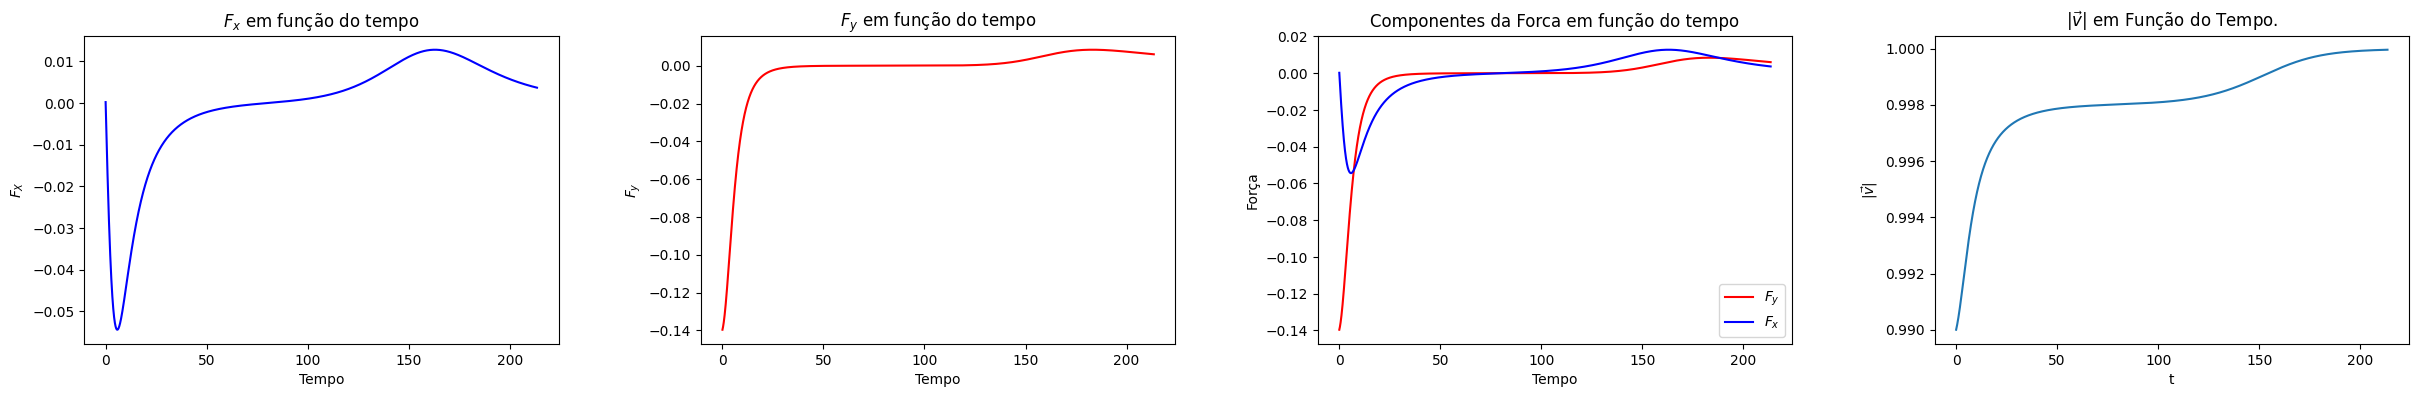

In [26]:
tf = 213.5 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

epsilon = 0.0559

r = np.array([x,vx,y,vy], float)   

force_x_values = []
force_y_values = []
velocidade = []

for t in ts:
    r = R4Krel(r,t,dt,epsilon)

    vel = (r[1]**2 + r[3]**2)**(1/2)
    velocidade.append(vel)
    force_x_values.append(ForceRel(r, epsilon)[0])
    force_y_values.append(ForceRel(r, epsilon)[1])

fig, axes = plt.subplots(1, 4, figsize=(30, 4))  # 1 linha, 4 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel(f'$F_X$')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel(f'$F_y$')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo")
axes[2].legend()
axes[2].set_ylabel("Força")

axes[3].plot(ts,velocidade)
axes[3].set_title(r'$|\vec{v}|$ em Função do Tempo.')
axes[3].set_xlabel('t')
axes[3].set_ylabel(r'$|\vec{v}|$')

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ Apenas essa ínfima alteração no valor do parâmetro $\epsilon$ foi capaz de alterar consideravelmente as características do gráfico. Apesar de ter sido analisado um valor de `tf` relativamente baixo, os gráficos já mostram que a força eventualmente tenderá a zero. Além disso, novamente o gráfico da velocidade em função dotempo não ultrapassou o valor unitário (que foi definido como a velocidade da luz), nos fazendo crer que essa instabilidade tem caráter físico válido.

## 3. Conclusão

$\quad$ Com toda essa análise, percebemos que, mesmo com um campo elétrico não-constante definido de maneira simples, a trajetória da partícula já apresenta certa sensibilidade em relação ao parâmetro $\epsilon$ (utilizado para definir $\vec{E}$), ao mesmo tempo em que observamos a diferença entre a descrição clássica e a relativística. A instabilidade observada no caso clássico não tem sentido físico, pois a velocidade da partícula ultrapassa $c$. Já nos casos relativísticos (com ou sem instabilidade), a velocidade nunca ultrapassa a velocidade da luz.

## Referências 

**[1]** https://pubs.aip.org/aip/pop/article/31/12/122118/3328945/Instability-of-motion-of-relativistic-charged?searchresult=1

**[2]** *Mark Newman - Computational Physics (2013, University of Michigan)*

**[3]** RESNICK, Robert. Introduction to special relativity. New York: John Wiley & Sons, 1968.